# MTSI - Modified Two-Stream Instability - Davies method
Solve in ordinary precision arithmetic.  Allow complex $\omega$.

Here, use the Davies method with squircle contour to find roots of $D(\omega)$ for given parameters and wavevector $\mathbf{k}$.

In [1]:
import Parameters
import PyPlot as plt
import QuadGK   # Note.  QuadGK seems to work with BigFloat, but NOT ArbComplex
import Roots    # for find_zero.  Parts of it work with univariate complex functions
                #  Note.  Looks like Roots works with BigFloat, but NOT ArbComplex

using FromFile
@from "tools.jl" import tools
@from "dispersion_tools_mtsi.jl" import dispersion_tools_mtsi

pd = dispersion_tools_mtsi

Main.C:\Users\jacot\Documents\Plasma Physics\Other\Jupyter Notebooks\Julia notebooks\dispersion_tools_mtsi.jl.dispersion_tools_mtsi

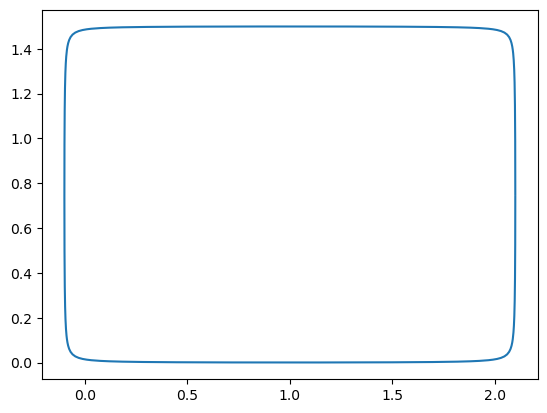

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000000154EB50>

In [42]:
# squircle parameters
a = 0.996  # squareness
Rx = 1   # center of recturcle in x  (omega_r)
rx = 1.1    # half-length of recturcle in x (omega_r)
Ry = 0.75  # with small epsilon, max of squircle in y goes to 2*Ry (omega_i)
epsilon = 1e-4
smallnum = 1e-4
params = tools.Sqparams(a, Rx, Ry, rx, epsilon, smallnum);

visualize = true
if visualize
    N = 500
    theta = tools.theta_circle(N)
    points_on_squircle = zeros(ComplexF64, N)
    for j = 1:N
        points_on_squircle[j] = tools.gamma(theta[j], params)
    end
    z = points_on_squircle;
    plt.plot(real(z), imag(z)) 
end

In [52]:
ui

14.142135623730951

In [75]:
mu = 1836
tau = 1
ui = sqrt(2) * 10
sigma = 1

k = 2.0
phi = sqrt(1/mu)

kxhat = k * cos(phi)
kzhat = k * sin(phi)
function D(omegahat)
    D, Dprime = dispersion_tools_mtsi.D_MTSI(omegahat, kxhat, kzhat, mu, tau, ui, sigma)
    return D
end

function Dprime(omegahat)
    D, Dprime = dispersion_tools_mtsi.D_MTSI(omegahat, kxhat, kzhat, mu, tau, ui, sigma)
    return Dprime
end

function DDprime(omegahat)
    D, Dprime = dispersion_tools_mtsi.D_MTSI(omegahat, kxhat, kzhat, mu, tau, ui, sigma)
    return D, Dprime
end

DDprime (generic function with 1 method)

In [77]:
sqrt(3)

1.7320508075688772

In [76]:
Npts = 20000
num_zeros = tools.count_zeros_inside_sq_contour(D, Npts, params)
println("Number of zeros found: ", num_zeros)
if num_zeros != 0
    roots = tools.all_roots(DDprime, num_zeros, Npts, params)
end

Number of zeros found: 1


1-element Vector{ComplexF64}:
 0.9985836597354215 + 0.4821179240866908im

## Refine the root

In [46]:
println("Before refining: D(ω) = ", D(roots[1]))
newroot = Roots.find_zero(D, roots[1], Roots.Secant())
println(newroot)
println("After refining: D(ω) = ", D(newroot))

Before refining: D(ω) = -1.8537012322046922e-7 + 4.7529059397184367e-7im
0.08914944027362541 + 0.15509263778675217im
After refining: D(ω) = 3.0791341698588326e-17 + 3.859759734048396e-17im


In [78]:
omegahat = 0.9985836597354215 + 0.4821179240866908im
khat = sqrt(kxhat^2 + kzhat^2)
ue = ui / sqrt(mu*tau)
vteSq_over_USq = tau*mu / (2*ui^2)
omegaLHSq_over_OmegaeSq = 1 / (mu * (sigma+1))
omegaLHSq_over_omegapeSq = sigma / (mu * (sigma+1))
kSq_times_lambdaDeSq = khat^2 * vteSq_over_USq * omegaLHSq_over_omegapeSq

zeta_e = omegahat / (kzhat / ue)
zeta_i = (omegahat - kxhat) / (khat / ui)
lambda = kxhat^2 * vteSq_over_USq * omegaLHSq_over_OmegaeSq

0.004997277182845639

In [82]:
lambda

0.004997277182845639